[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/01_Train_first_Neural_Network_Basic_Classification.ipynb)

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

This guide uses tf.keras, a high-level API to build and train model in TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


## 1. Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categorical. The images show ! The images show individual articles of clothing at low resolution ($28 \times 28$)

![Fashion MNIST](https://tensorflow.org/images/fashion-mnist-sprite.png)

This guide uses Fashion MNIST for variety, and because it is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify an algorithm works as expected. They are good starting points to test and debug code. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns 4 NumPy arrays:


*   The train_images and train_labels arrays are the training set -- the data the model uses to learn
*   The model is tested agaist the test set, the test_images, and test_labels arrays.



Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 2. Explore the data

In [4]:
print('training images shape {}'.format(train_images.shape))

training images shape (60000, 28, 28)


In [5]:
print('training label length {}'.format(len(train_labels)))

training label length 60000


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print('testing images shape {}'.format(test_images.shape))

testing images shape (10000, 28, 28)


In [8]:
print('testing label length {}'.format(len(test_labels)))

testing label length 10000


## 3. Preprocessing the data

The data must be preprocessed before training the network.

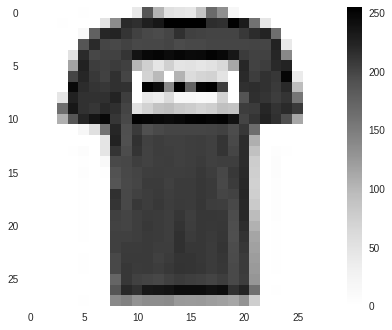

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. It's import that the training set and testing set are preprocessed in the same way.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format.

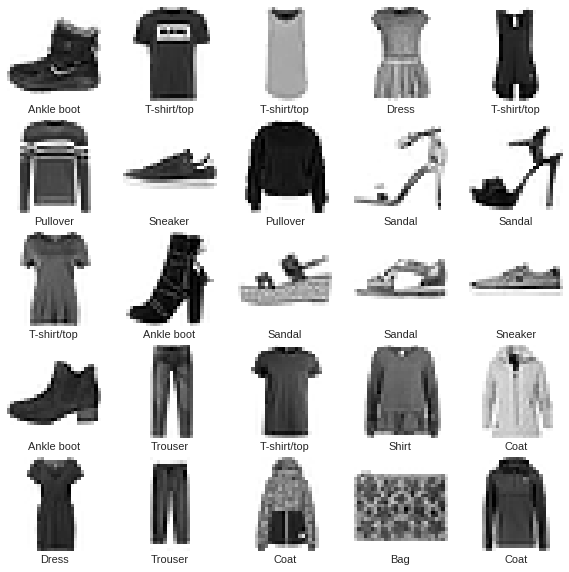

In [13]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## 4. Build the Model

Build the neural network requires configuring the layers of the model, then compiling the model.

### 4.1 Setup the layers

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network,` tf.keras.layers.Flatten` transforms the format of the images from a 2d-array ( of $28 \times 28$ pixels), to a 1d-array of $28 \times 28 = 784$ pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

Afer the pixels are flattend, the network consists of a sequence of two `tf.keras.layers.Dense` layers has 128 nodes (or neurons). The last layer is 10-node *softmax* layer - this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### 4.2 Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step: 


*   Loss function - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right directioin.
*   Optimizer - This is how the model is updated based on the data it sees and its loss function
*   Metrics - Used to monitor the training and testing steps. 


In [0]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 4.3 Train the model

Training the neural network model requires the following steps:



1.   Feed the training data to the model. in this example, the train_images and train_labels arrays
2.   The model learns to associate images and labels
3.    We ask the model to make predictions about a test set-in this example, the test-images array. We verify that the predictions match the labels from the test_labels array



In [16]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 108us/step - loss: 2.3297 - acc: 0.1424
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 2.1292 - acc: 0.2120
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.9873 - acc: 0.2832
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.8752 - acc: 0.3854
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.7812 - acc: 0.4665
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.6991 - acc: 0.5192
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.6253 - acc: 0.5593
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.5583 - acc: 0.5871
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.4975 - acc: 0.6082
Epoch 10/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.4422 - acc: 0.624

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.62 on the training data.

### 4.4 Evaluate accuracy

Next, compare how the model performs on the test dataset

In [17]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.6284


### 4.5 Make predictions

With the model trained, we can use it to make predictions about some images

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. 

In [19]:
predictions[0]

array([0.04073562, 0.02026923, 0.07504299, 0.03317018, 0.03961883,
       0.18327093, 0.05011577, 0.15945728, 0.15697908, 0.24134007],
      dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value.

In [20]:
np.argmax(predictions[0])

9

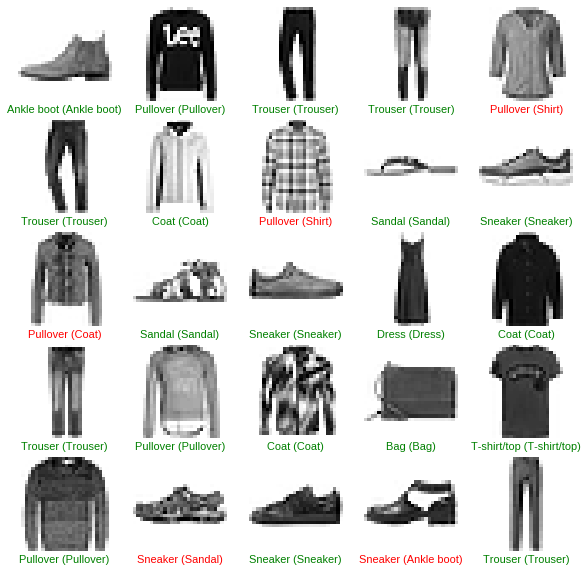

In [21]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green. incorrect predictions in red

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                               class_names[true_label]),
                               color=color)